In [28]:
import tensorflow as tf
from tensorflow import keras #Sequential and functional API
from tensorflow.keras import layers
from tensorflow.keras.datasets import cifar10
from keras.applications.resnet50 import ResNet50
from keras.preprocessing import image 
from keras.applications.resnet50 import preprocess_input, decode_predictions
import numpy as np
import matplotlib.pyplot as plt

In [29]:
(x_train,y_train), (x_test,y_test) = cifar10.load_data()
print(x_train.shape)
print(y_train.shape)

(50000, 32, 32, 3)
(50000, 1)


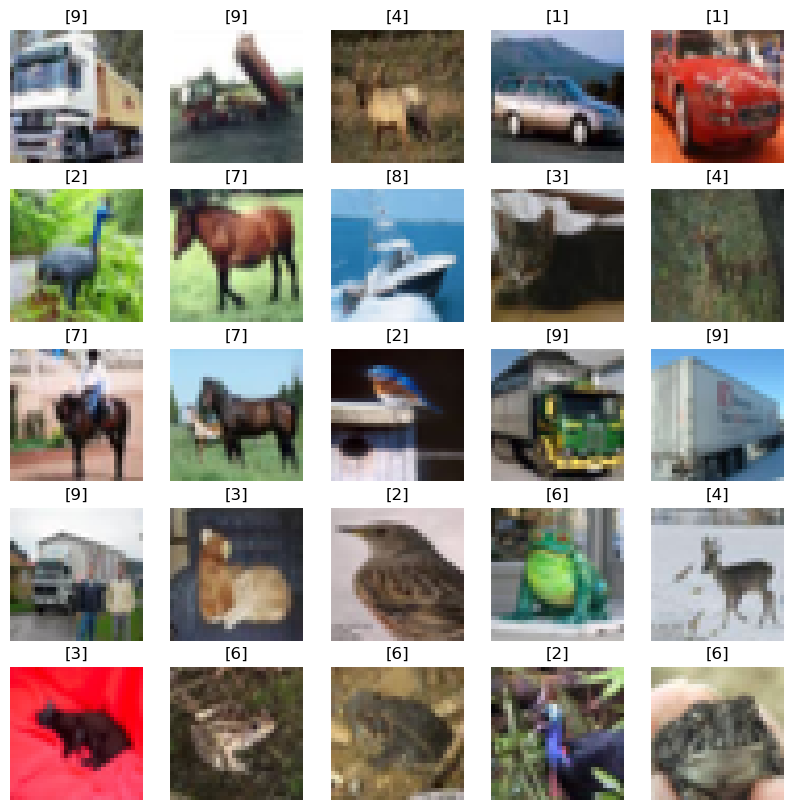

In [30]:
plt.figure(figsize = (10,10))
for i in range(1,26):
    plt.subplot(5,5,i)
    plt.imshow(x_train[i],cmap = 'gray')
    plt.title(y_train[i])
    plt.axis('off')
plt.show()

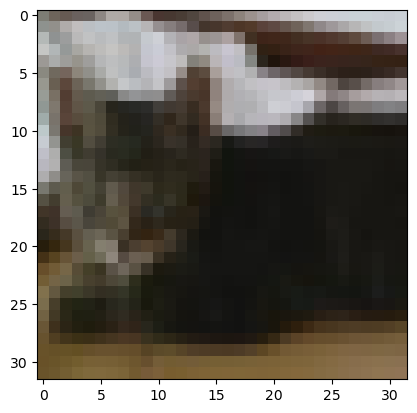

In [31]:
plt.imshow(x_train[9])
plt.show()

<function matplotlib.pyplot.show(close=None, block=None)>

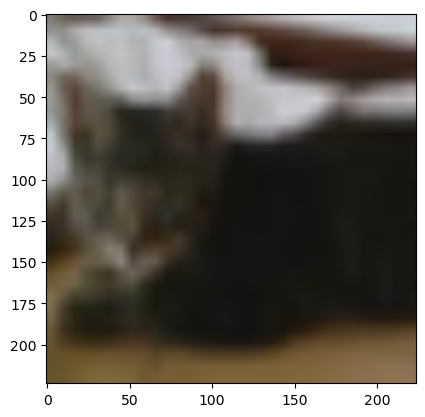

In [32]:
img=image.img_to_array(tf.image.resize(x_train[9],[224,224]))
plt.imshow(img.astype('int32'))
plt.show

In [33]:
model=ResNet50(weights="imagenet")

In [34]:
x=np.expand_dims(img,axis=0)

In [35]:
preds=model.predict(x)

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 559ms/step


In [36]:
print("Predicted",decode_predictions(preds,top=5)[0])

Predicted [('n04127249', 'safety_pin', 0.14030914), ('n03658185', 'letter_opener', 0.070594534), ('n02951585', 'can_opener', 0.050077453), ('n03109150', 'corkscrew', 0.03939032), ('n03825788', 'nipple', 0.037242983)]


In [82]:
print(x_train.shape)
print(x_test.shape)

(1000, 224, 224, 3)
(200, 224, 224, 3)


In [84]:
 model = ResNet50(include_top = False, input_shape=(224,224,3))

In [85]:
model.summary()

Model: "resnet50"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer_2       │ (None, 224, 224,  │          0 │ -                 │
│ (InputLayer)        │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1_pad           │ (None, 230, 230,  │          0 │ input_layer_2[0]… │
│ (ZeroPadding2D)     │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1_conv (Conv2D) │ (None, 112, 112,  │      9,472 │ conv1_pad[0][0]   │
│                     │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1_bn            │ (None, 112, 112,  │        256 │ conv1_conv[0][0]  │
│ (BatchNormalizatio… │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1_relu          │ (None, 112, 112,  │          0 │ conv1_bn[0][0]    │
│ (Activation)        │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ pool1_pad           │ (None, 114, 114,  │          0 │ conv1_relu[0][0]  │
│ (ZeroPadding2D)     │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ pool1_pool          │ (None, 56, 56,    │          0 │ pool1_pad[0][0]   │
│ (MaxPooling2D)      │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_1_conv │ (None, 56, 56,    │      4,160 │ pool1_pool[0][0]  │
│ (Conv2D)            │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_1_bn   │ (None, 56, 56,    │        256 │ conv2_block1_1_c… │
│ (BatchNormalizatio… │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_1_relu │ (None, 56, 56,    │          0 │ conv2_block1_1_b… │
│ (Activation)        │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_2_conv │ (None, 56, 56,    │     36,928 │ conv2_block1_1_r… │
│ (Conv2D)            │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_2_bn   │ (None, 56, 56,    │        256 │ conv2_block1_2_c… │
│ (BatchNormalizatio… │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_2_relu │ (None, 56, 56,    │          0 │ conv2_block1_2_b… │
│ (Activation)        │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_0_conv │ (None, 56, 56,    │     16,640 │ pool1_pool[0][0]  │
│ (Conv2D)            │ 256)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_3_conv │ (None, 56, 56,    │     16,640 │ conv2_block1_2_r… │
│ (Conv2D)            │ 256)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_0_bn   │ (None, 56, 56,    │      1,024 │ conv2_block1_0_c… │
│ (BatchNormalizatio… │ 256)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_3_bn   │ (None, 56, 56,    │      1,024 │ conv2_block1_3_c

 Total params: 23,587,712 (89.98 MB)

 Trainable params: 23,534,592 (89.78 MB)

 Non-trainable params: 53,120 (207.50 KB)

In [86]:
for layer in model.layers:
    layer.trainable=False

In [90]:
x=model.output
x=keras.layers.GlobalAveragePooling2D()(x)
x=keras.layers.Flatten()(x)
x=keras.layers.Dense(1024,activation='relu')(x)
x=keras.layers.Dropout(0.3)(x)
x=keras.layers.Dense(128,activation='relu')(x)
x=keras.layers.Dropout(0.3)(x)
output=keras.layers.Dense(10,activation='softmax')(x)

In [92]:
TLModel=keras.Model(inputs=model.input,outputs=output)

In [94]:
# x_train=image.smart_resize(x_train,size=(224,224))
# x_test=image.smart_resize(x_test,size=(224,224))

In [96]:
np.unique(y_train[:1000],return_counts=True)

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=uint8),
 array([102, 112,  99,  92,  99,  85, 107, 102,  99, 103]))

In [98]:
nx_train=x_train[:5000]
ny_train=y_train[:5000]

nx_test=x_test[:200]
ny_test=y_test[:200]


In [100]:
x_train=tf.image.resize(nx_train,(224,224))
x_test=tf.image.resize(nx_test,(224,224))

nx_train=preprocess_input(nx_train)
nx_test=preprocess_input(nx_test)



In [104]:
TLModel.compile(optimizer=keras.optimizers.Adam(),
               loss=keras.losses.SparseCategoricalCrossentropy(),
               metrics=['accuracy'])

In [106]:
TLModel.fit(nx_train,ny_train,batch_size=32,epochs=20,validation_data=(nx_test,ny_test))

Epoch 1/20
32/32 ━━━━━━━━━━━━━━━━━━━━ 37s 1s/step - accuracy: 0.3681 - loss: 2.0425 - val_accuracy: 0.7000 - val_loss: 0.7907
Epoch 2/20
32/32 ━━━━━━━━━━━━━━━━━━━━ 37s 1s/step - accuracy: 0.7393 - loss: 0.7491 - val_accuracy: 0.7550 - val_loss: 0.7272
Epoch 3/20
32/32 ━━━━━━━━━━━━━━━━━━━━ 38s 1s/step - accuracy: 0.8255 - loss: 0.5013 - val_accuracy: 0.7750 - val_loss: 0.6785
Epoch 4/20
32/32 ━━━━━━━━━━━━━━━━━━━━ 40s 1s/step - accuracy: 0.8849 - loss: 0.3391 - val_accuracy: 0.7700 - val_loss: 0.6534
Epoch 5/20
32/32 ━━━━━━━━━━━━━━━━━━━━ 40s 1s/step - accuracy: 0.9061 - loss: 0.2511 - val_accuracy: 0.7950 - val_loss: 0.5874
Epoch 6/20
32/32 ━━━━━━━━━━━━━━━━━━━━ 41s 1s/step - accuracy: 0.9515 - loss: 0.1727 - val_accuracy: 0.7850 - val_loss: 0.6963
Epoch 7/20
32/32 ━━━━━━━━━━━━━━━━━━━━ 41s 1s/step - accuracy: 0.9308 - loss: 0.1876 - val_accuracy: 0.8050 - val_loss: 0.7587
Epoch 8/20
32/32 ━━━━━━━━━━━━━━━━━━━━ 42s 1s/step - accuracy: 0.9445 - loss: 0.1679 - val_accuracy: 0.7550 - val_loss:

KeyboardInterrupt: 

In [22]:
# input_shape = (32,32,3)
# num_classes = 10
# model = keras.Sequential(
#     [
#         keras.Input(shape=input_shape),
#         keras.layers.Conv2D(32,kernel_size = (3,3),activation='relu'),
#         keras.layers.MaxPool2D(pool_size = (2,2)),
#         keras.layers.Conv2D(64,kernel_size = (3,3),padding = 'same',activation='relu'),
#         keras.layers.MaxPool2D(pool_size = (2,2)),
#          keras.layers.Conv2D(128,kernel_size = (3,3),padding = 'same',activation='relu'),
#         keras.layers.MaxPool2D(pool_size = (2,2)),
#          keras.layers.Conv2D(256,kernel_size = (3,3),padding = 'same',activation='relu'),
#         keras.layers.MaxPool2D(pool_size = (2,2)),
#         keras.layers.Flatten(),
#         keras.layers.Dense(1024,activation='relu'),
#         keras.layers.Dropout(0.3),
#         keras.layers.Dense(num_classes,activation='softmax')
#     ]
# )

In [2]:
# model.summary()

In [4]:
# keras.utils.plot_model(model,to_file='CIFAR-10_CNN.png',show_shapes=True,show_layer_names=True)

In [6]:
# model.compile(
#     optimizer = keras.optimizers.Adam(learning_rate=1e-4),
#     loss = 'sparse_categorical_crossentropy',
#     metrics=['accuracy']
# )

In [8]:
# history = model.fit(x_train,y_train,epochs=15,validation_data=(x_test,y_test))

In [10]:
# model.evaluate(x_test,y_test)